## Author : Moumita Murmu

## Task 6: Prediction Using Decision Tree Algorithm

### Purpose: Create Decision Tree Classifier and visualize it graphically. (If we feed any new data to this classifier, it would be able to predict the right class accordingly.)

### The Sparks Foundation - GRIP

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree

from sklearn.metrics import confusion_matrix, classification_report

import graphviz
#from sklearn.externals.six import StringIO # Fetch the data
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import pydot

In [2]:
data = pd.read_csv(r'C:\.............\Internships\GRIP TSF\dataset\Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Univariate Analysis

In [3]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### Removing Id column from the dataset

In [4]:
data = data.drop(['Id'], axis=1)
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### checking the Species distribution 

In [5]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

### Checking Missing Value

In [6]:
data.isnull().sum(axis=0)

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Taking subset of data - Numerical & Categorical

In [7]:
num_data = data[data.select_dtypes(include=[np.number]).columns.tolist()]

In [8]:
cat_data = data[data.select_dtypes(exclude=[np.number]).columns.tolist()]

In [9]:
cat_data = cat_data.apply(LabelEncoder().fit_transform)

### Combining Numerical & Categorical Data

In [10]:
new_data = pd.concat([num_data, cat_data], axis=1)

In [11]:
new_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
#data.head()

### Data Partition

In [13]:
X = new_data.drop(['Species'], axis=1)
Y = new_data[['Species']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=241)

### Model Building
#### (Without pruning)

In [14]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

### Plotting the Tree

In [15]:
df = pd.concat([Y_train, X_train], axis=1)

In [16]:
features = list(df.columns[1:])
features

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

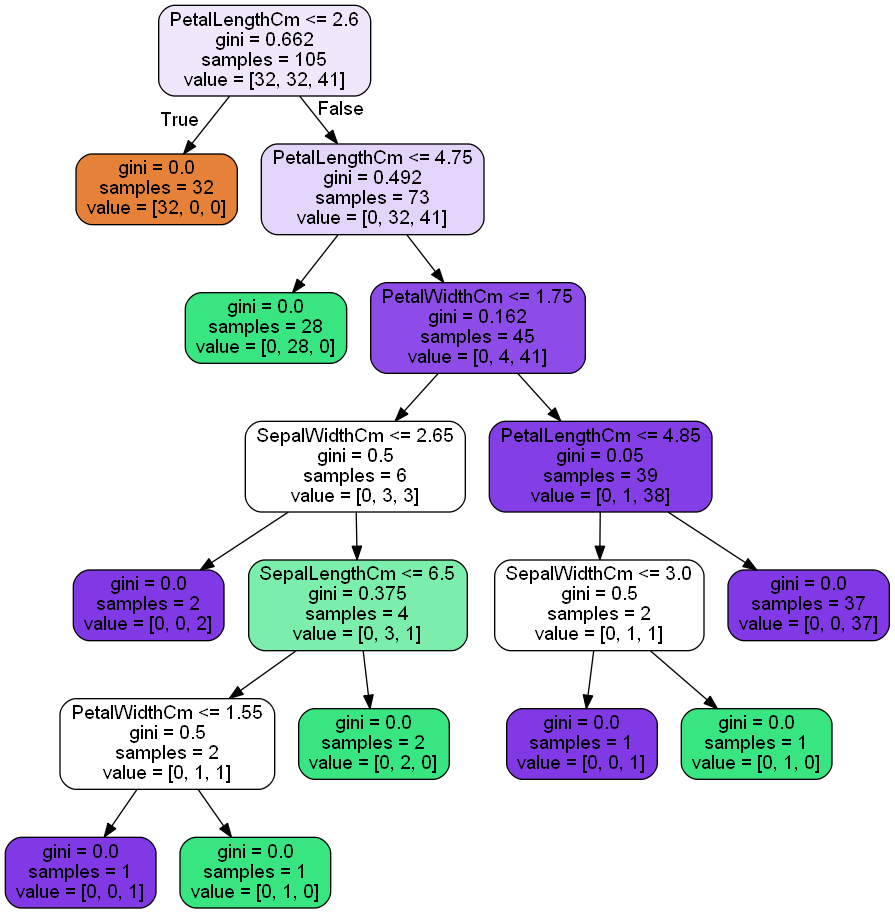

In [17]:
dot_data=StringIO()

export_graphviz(dt, out_file=dot_data, filled=True,
               feature_names=features, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

#### Prediction Train Dataset

In [18]:
y_predict = dt.predict(X_train)

In [19]:
train = pd.concat([X_train, Y_train], axis=1)

In [20]:
train['Predicted'] = y_predict

### Predictions on Test Data

In [21]:
y_prediction = dt.predict(X_test)

In [22]:
test = pd.concat([X_test, Y_test], axis=1)

In [23]:
test['Predicted'] = y_prediction

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Species'], test['Predicted'])
print(confusion_matrix)

[[18  0  0]
 [ 0 17  1]
 [ 0  2  7]]


In [25]:
confusion_matrix_df = pd.DataFrame(confusion_matrix,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])

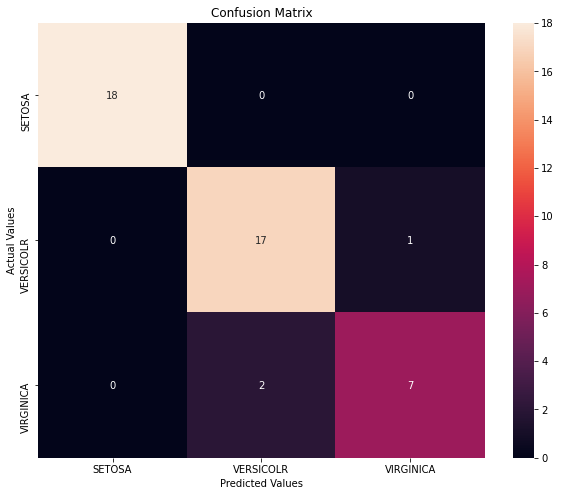

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [27]:
print(classification_report(Y_test, test['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.89      0.94      0.92        18
           2       0.88      0.78      0.82         9

    accuracy                           0.93        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.93      0.93      0.93        45



### Decision Tree After Pruning 

In [28]:
dtprune = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=10, min_samples_split=20, max_depth=3)
dtprune.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=20)

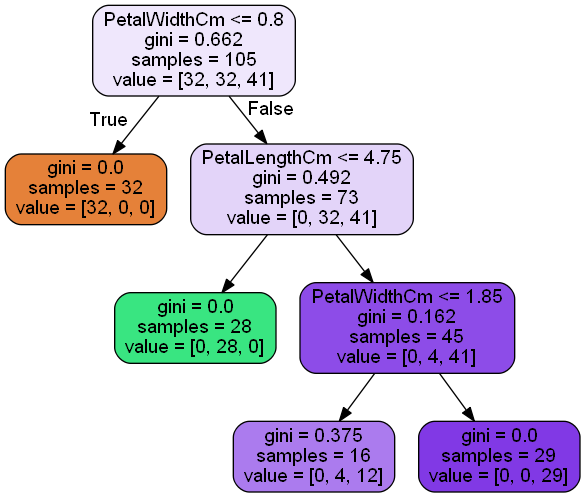

In [29]:
dot_data=StringIO()

export_graphviz(dtprune, out_file=dot_data, filled=True,
               feature_names=features, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [30]:
y_predict_pr = dtprune.predict(X_train)
train['Predicted_pr'] = y_predict_pr

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Species'], train['Predicted_pr'])
print(confusion_matrix)

[[32  0  0]
 [ 0 28  4]
 [ 0  0 41]]


In [31]:
y_prediction_pr = dtprune.predict(X_test)
test['Predicted_pr'] = y_prediction_pr

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Species'], test['Predicted_pr'])
print(confusion_matrix)

[[18  0  0]
 [ 0 16  2]
 [ 0  1  8]]


In [32]:
print(classification_report(Y_test, test['Predicted_pr']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.94      0.89      0.91        18
           2       0.80      0.89      0.84         9

    accuracy                           0.93        45
   macro avg       0.91      0.93      0.92        45
weighted avg       0.94      0.93      0.93        45



******

### Now if we feed any new data to this classifier, it would be able to predict the correct class accordingly.

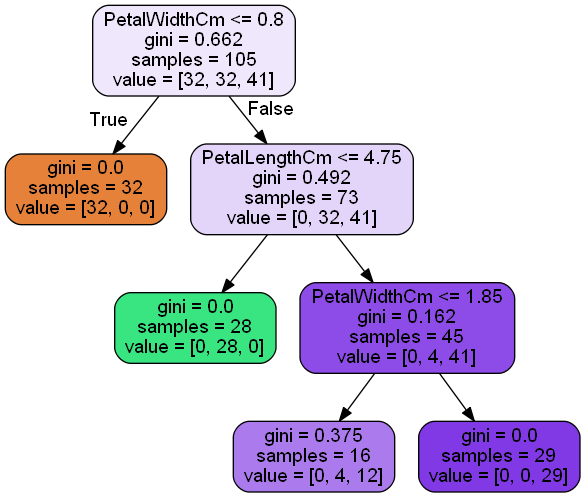



Thank You